In [724]:
import numpy as np
import pandas as pd
import torch
import torch.optim as optim
from torch import nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import functools as Fntl
from functools import reduce
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

In [4]:
%ls data/2011

2011-capitalbikeshare-tripdata.csv  2011-capitalbikeshare-tripdata.zip


In [5]:
tb0 = np.loadtxt("data/2011/2011-capitalbikeshare-tripdata.csv",
                 delimiter=",", dtype=str)

In [14]:
df0 = pd.read_csv("data/2011/2011-capitalbikeshare-tripdata.csv")

In [15]:
df0

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,3548,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,5th & F St NW,31620,5th & F St NW,W00247,Member
1,346,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,14th & Harvard St NW,31101,14th & V St NW,W00675,Casual
2,562,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,Georgia & New Hampshire Ave NW,31104,Adams Mill & Columbia Rd NW,W00357,Member
3,434,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,10th & U St NW,31503,Florida Ave & R St NW,W00970,Member
4,233,2011-01-01 00:28:26,2011-01-01 00:32:19,31104,Adams Mill & Columbia Rd NW,31106,Calvert & Biltmore St NW,W00346,Casual
...,...,...,...,...,...,...,...,...,...
1226762,300,2011-12-31 23:41:19,2011-12-31 23:46:20,31201,15th & P St NW,31214,17th & Corcoran St NW,W01459,Member
1226763,387,2011-12-31 23:46:43,2011-12-31 23:53:10,31223,Convention Center / 7th & M St NW,31201,15th & P St NW,W01262,Member
1226764,261,2011-12-31 23:47:27,2011-12-31 23:51:49,31107,Lamont & Mt Pleasant NW,31602,Park Rd & Holmead Pl NW,W00998,Member
1226765,2060,2011-12-31 23:55:12,2012-01-01 00:29:33,31205,21st & I St NW,31222,New York Ave & 15th St NW,W00042,Member


In [16]:
df1 = pd.read_csv("data/from_book/hour.csv")

In [17]:
df1

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [27]:
df1.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [29]:
counts = df1['cnt'][:50]

In [32]:
x = df1['instant'][:50]

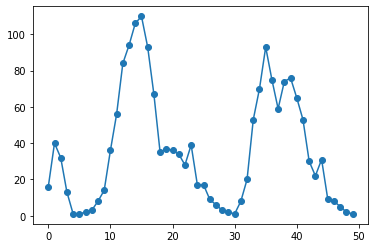

In [34]:
plt.plot(counts,'o-')

### Target unnormalized

In [162]:
tgt = torch.tensor(counts)

In [163]:
tgt

tensor([ 16,  40,  32,  13,   1,   1,   2,   3,   8,  14,  36,  56,  84,  94,
        106, 110,  93,  67,  35,  37,  36,  34,  28,  39,  17,  17,   9,   6,
          3,   2,   1,   8,  20,  53,  70,  93,  75,  59,  74,  76,  65,  53,
         30,  22,  31,   9,   8,   5,   2,   1])

In [164]:
tgt = tgt.reshape(50,1)
tgt.size()

torch.Size([50, 1])

In [165]:
tgt = tgt.float()
tgt

tensor([[ 16.],
        [ 40.],
        [ 32.],
        [ 13.],
        [  1.],
        [  1.],
        [  2.],
        [  3.],
        [  8.],
        [ 14.],
        [ 36.],
        [ 56.],
        [ 84.],
        [ 94.],
        [106.],
        [110.],
        [ 93.],
        [ 67.],
        [ 35.],
        [ 37.],
        [ 36.],
        [ 34.],
        [ 28.],
        [ 39.],
        [ 17.],
        [ 17.],
        [  9.],
        [  6.],
        [  3.],
        [  2.],
        [  1.],
        [  8.],
        [ 20.],
        [ 53.],
        [ 70.],
        [ 93.],
        [ 75.],
        [ 59.],
        [ 74.],
        [ 76.],
        [ 65.],
        [ 53.],
        [ 30.],
        [ 22.],
        [ 31.],
        [  9.],
        [  8.],
        [  5.],
        [  2.],
        [  1.]])

### normalized Target

In [247]:
tgt_n = tgt / 100.

In [248]:
tgt_n = tgt_n.reshape(50,1)

In [249]:
tgt_n

tensor([[0.1600],
        [0.4000],
        [0.3200],
        [0.1300],
        [0.0100],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0800],
        [0.1400],
        [0.3600],
        [0.5600],
        [0.8400],
        [0.9400],
        [1.0600],
        [1.1000],
        [0.9300],
        [0.6700],
        [0.3500],
        [0.3700],
        [0.3600],
        [0.3400],
        [0.2800],
        [0.3900],
        [0.1700],
        [0.1700],
        [0.0900],
        [0.0600],
        [0.0300],
        [0.0200],
        [0.0100],
        [0.0800],
        [0.2000],
        [0.5300],
        [0.7000],
        [0.9300],
        [0.7500],
        [0.5900],
        [0.7400],
        [0.7600],
        [0.6500],
        [0.5300],
        [0.3000],
        [0.2200],
        [0.3100],
        [0.0900],
        [0.0800],
        [0.0500],
        [0.0200],
        [0.0100]])

### unnormalized input

In [523]:
inp = torch.tensor([i for i in range(len(x))]).float()

In [524]:
inp = inp.reshape(50,1)
inp.size()

torch.Size([50, 1])

In [168]:
inp

tensor([[ 0.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [29.],
        [30.],
        [31.],
        [32.],
        [33.],
        [34.],
        [35.],
        [36.],
        [37.],
        [38.],
        [39.],
        [40.],
        [41.],
        [42.],
        [43.],
        [44.],
        [45.],
        [46.],
        [47.],
        [48.],
        [49.]])

### normalized input

In [250]:
inp_n = inp / 50.

In [251]:
inp_n

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [169]:
n_h = 10

In [170]:
loss_fn = nn.MSELoss()

### Test target

In [512]:
counts_test = df1['cnt'][50:100]

In [519]:
tgt_test = torch.tensor(np.array(counts_test, dtype = float)).reshape(50,1)

### Test input

In [525]:
inp_test = torch.tensor([i for i in range(50, 100)]).float().reshape(50,1)

In [527]:
n_inp_test = inp_test / 50

In [528]:
n_inp_test

tensor([[1.0000],
        [1.0200],
        [1.0400],
        [1.0600],
        [1.0800],
        [1.1000],
        [1.1200],
        [1.1400],
        [1.1600],
        [1.1800],
        [1.2000],
        [1.2200],
        [1.2400],
        [1.2600],
        [1.2800],
        [1.3000],
        [1.3200],
        [1.3400],
        [1.3600],
        [1.3800],
        [1.4000],
        [1.4200],
        [1.4400],
        [1.4600],
        [1.4800],
        [1.5000],
        [1.5200],
        [1.5400],
        [1.5600],
        [1.5800],
        [1.6000],
        [1.6200],
        [1.6400],
        [1.6600],
        [1.6800],
        [1.7000],
        [1.7200],
        [1.7400],
        [1.7600],
        [1.7800],
        [1.8000],
        [1.8200],
        [1.8400],
        [1.8600],
        [1.8800],
        [1.9000],
        [1.9200],
        [1.9400],
        [1.9600],
        [1.9800]])

### ReLU

In [234]:
ln_rate = 0.00003

In [235]:
rw1 = torch.randn(1, n_h, requires_grad = True)

rb1 = torch.randn(n_h, requires_grad = True)

rw2 = torch.randn(n_h, 1, requires_grad = True)

rb2 = torch.randn(1, requires_grad = True)

In [236]:
r_losses = []

In [237]:
for i in range(100000):
    hidden = F.relu(inp @ rw1 + rb1)
    preds = hidden @ rw2 + rb2
    loss = loss_fn(preds, tgt)
    
    loss.backward()
    #print(w1.data, '\n')
    rw1.data.add_(- ln_rate * rw1.grad)
    rb1.data.add_(- ln_rate * rb1.grad)
    rw2.data.add_(- ln_rate * rw2.grad)
    rb2.data.add_(- ln_rate * rb2.grad)
    #print(w1.grad, '\n')
    #print(w1.data, '\n')
    rw1.grad.zero_()
    rb1.grad.zero_()
    rw2.grad.zero_()
    rb2.grad.zero_()
    #print(w1.grad, '\n\n')
    r_losses.append([loss.detach().numpy()])
    if i % 10000 == 0:
        print('loss: ', loss)
    

loss:  tensor(1652.1616, grad_fn=<MseLossBackward0>)
loss:  tensor(841.3938, grad_fn=<MseLossBackward0>)
loss:  tensor(826.2835, grad_fn=<MseLossBackward0>)
loss:  tensor(821.4706, grad_fn=<MseLossBackward0>)
loss:  tensor(848.9476, grad_fn=<MseLossBackward0>)
loss:  tensor(823.0625, grad_fn=<MseLossBackward0>)
loss:  tensor(798.9207, grad_fn=<MseLossBackward0>)
loss:  tensor(792.8903, grad_fn=<MseLossBackward0>)
loss:  tensor(827.0231, grad_fn=<MseLossBackward0>)
loss:  tensor(819.5293, grad_fn=<MseLossBackward0>)


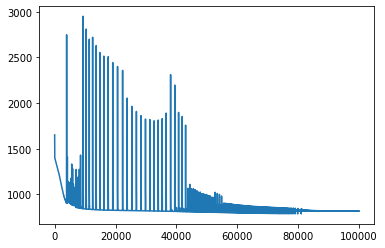

In [238]:
plt.plot(r_losses)

In [239]:
def r_inf():
    with torch.no_grad():
        hidden = F.relu(inp @ w1 + b1)
        preds = hidden @ w2 + b2
    return preds

In [240]:
r_pred = r_inf()

In [241]:
r_pred

tensor([[2096.3901],
        [1956.2367],
        [1795.0056],
        [1618.6134],
        [1378.4401],
        [1138.2670],
        [ 898.0936],
        [ 657.9203],
        [ 417.7469],
        [ 177.5738],
        [ -43.5698],
        [-221.9474],
        [-349.2218],
        [-441.3337],
        [-533.4454],
        [-625.5573],
        [-717.6693],
        [-809.7811],
        [-772.2105],
        [-733.4827],
        [-694.7547],
        [-656.0267],
        [-617.2989],
        [-578.5710],
        [-539.8433],
        [-501.1154],
        [-462.3874],
        [-423.6596],
        [-384.9317],
        [-346.2038],
        [-307.4759],
        [-268.7481],
        [-230.0204],
        [-191.2925],
        [-152.5647],
        [-113.8367],
        [ -75.1088],
        [ -36.3810],
        [   2.3469],
        [  41.0750],
        [  79.8023],
        [ 118.5305],
        [ 157.2584],
        [ 195.9861],
        [ 234.7139],
        [ 273.4419],
        [ 312.1696],
        [ 350

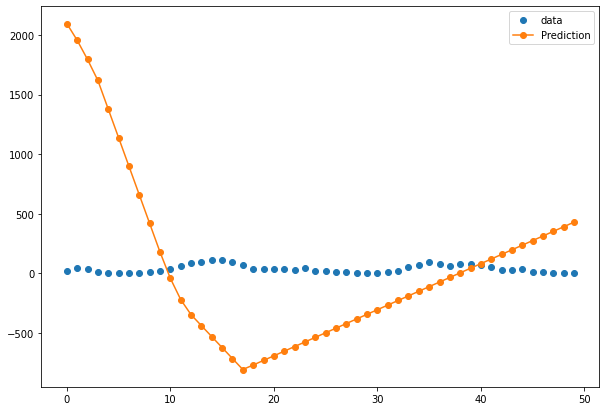

In [245]:
plt.figure(figsize = (10, 7))
x_data = inp.numpy()
pred_data = r_pred.numpy()
cnt_plot, = plt.plot(x_data, counts, 'o')
pred_plot, = plt.plot(x_data, pred_data, 'o-')
plt.legend([cnt_plot, pred_plot],['data', 'Prediction'])
plt.show()

## sigmoid

In [205]:
ln_rate = 0.00003

In [214]:
w1 = torch.randn(1, n_h, requires_grad = True)

b1 = torch.randn(n_h, requires_grad = True)

w2 = torch.randn(n_h, 1, requires_grad = True)

b2 = torch.randn(1, requires_grad = True)

In [215]:
losses = []

In [228]:
for i in range(1000000):
    hidden = F.sigmoid(inp @ w1 + b1)
    preds = hidden @ w2 + b2
    loss = loss_fn(preds, tgt)
    
    loss.backward()
    #print(w1.data, '\n')
    w1.data.add_(- ln_rate * w1.grad)
    b1.data.add_(- ln_rate * b1.grad)
    w2.data.add_(- ln_rate * w2.grad)
    b2.data.add_(- ln_rate * b2.grad)
    #print(w1.grad, '\n')
    #print(w1.data, '\n')
    w1.grad.zero_()
    b1.grad.zero_()
    w2.grad.zero_()
    b2.grad.zero_()
    #print(w1.grad, '\n\n')
    losses.append([loss.detach().numpy()])
    if i % 10000 == 0:
        print('loss: ', loss)
    

/Users/balisun/dev-pkgs/miniconda3/envs/PyMooHong/lib/python3.8/site-packages/torch/nn/functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


loss:  tensor(830.7632, grad_fn=<MseLossBackward0>)
loss:  tensor(811.4351, grad_fn=<MseLossBackward0>)
loss:  tensor(792.3236, grad_fn=<MseLossBackward0>)
loss:  tensor(773.7809, grad_fn=<MseLossBackward0>)
loss:  tensor(756.3375, grad_fn=<MseLossBackward0>)
loss:  tensor(739.9464, grad_fn=<MseLossBackward0>)
loss:  tensor(724.5149, grad_fn=<MseLossBackward0>)
loss:  tensor(709.9741, grad_fn=<MseLossBackward0>)
loss:  tensor(696.2517, grad_fn=<MseLossBackward0>)
loss:  tensor(683.2886, grad_fn=<MseLossBackward0>)
loss:  tensor(671.0226, grad_fn=<MseLossBackward0>)
loss:  tensor(659.4188, grad_fn=<MseLossBackward0>)
loss:  tensor(648.4375, grad_fn=<MseLossBackward0>)
loss:  tensor(638.0496, grad_fn=<MseLossBackward0>)
loss:  tensor(628.2207, grad_fn=<MseLossBackward0>)
loss:  tensor(618.9255, grad_fn=<MseLossBackward0>)
loss:  tensor(610.1469, grad_fn=<MseLossBackward0>)
loss:  tensor(601.8572, grad_fn=<MseLossBackward0>)
loss:  tensor(593.9968, grad_fn=<MseLossBackward0>)
loss:  tenso

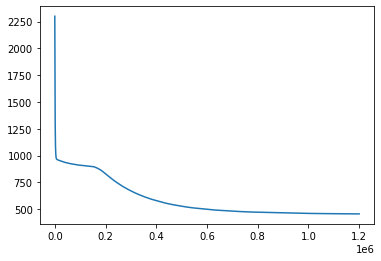

In [229]:
plt.plot(losses)

In [230]:
def inf():
    with torch.no_grad():
        hidden = F.sigmoid(inp @ w1 + b1)
        preds = hidden @ w2 + b2
    return preds

In [231]:
pred = inf()

In [232]:
pred

tensor([[24.4869],
        [31.3404],
        [29.5029],
        [13.1532],
        [ 4.4955],
        [ 3.8642],
        [ 3.9004],
        [ 4.4429],
        [ 6.8987],
        [15.5293],
        [33.9150],
        [58.5078],
        [82.7232],
        [95.1885],
        [98.6292],
        [98.2824],
        [91.3487],
        [66.2291],
        [40.7571],
        [33.4343],
        [32.2143],
        [32.0328],
        [32.0062],
        [32.0023],
        [32.0017],
        [32.0016],
        [32.0015],
        [32.0015],
        [32.0015],
        [32.0015],
        [32.0015],
        [32.0015],
        [32.0015],
        [32.0015],
        [32.0015],
        [32.0015],
        [32.0015],
        [32.0015],
        [32.0015],
        [32.0015],
        [32.0015],
        [32.0015],
        [32.0015],
        [32.0015],
        [32.0015],
        [32.0015],
        [32.0015],
        [32.0015],
        [32.0015],
        [32.0015]])

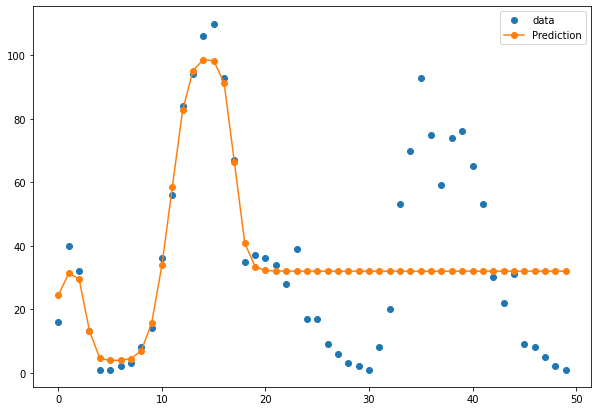

In [244]:
plt.figure(figsize = (10, 7))
x_data = inp.numpy()
pred_data = pred.numpy()
cnt_plot, = plt.plot(x_data, counts, 'o')
pred_plot, = plt.plot(x_data, pred_data, 'o-')
plt.legend([cnt_plot, pred_plot],['data', 'Prediction'])
plt.show()

### ReLU - normalized

In [382]:
nrw1 = torch.randn(1, n_h, requires_grad = True)

nrb1 = torch.randn(n_h, requires_grad = True)

nrw2 = torch.randn(n_h, 1, requires_grad = True)

nrb2 = torch.randn(1, requires_grad = True)

In [383]:
nr_losses = []

In [384]:
ln_rate = 0.9

In [385]:
for i in range(100000):
    hidden = F.relu(inp_n @ nrw1 + nrb1)
    preds = hidden @ nrw2 + nrb2
    loss = loss_fn(preds, tgt_n)
    
    loss.backward()
    #print(w1.data, '\n')
    nrw1.data.add_(- ln_rate * nrw1.grad)
    nrb1.data.add_(- ln_rate * nrb1.grad)
    nrw2.data.add_(- ln_rate * nrw2.grad)
    nrb2.data.add_(- ln_rate * nrb2.grad)
    #print(w1.grad, '\n')
    #print(w1.data, '\n')
    nrw1.grad.zero_()
    nrb1.grad.zero_()
    nrw2.grad.zero_()
    nrb2.grad.zero_()
    #print(w1.grad, '\n\n')
    nr_losses.append([loss.detach().numpy()])
    if i % 10000 == 0:
        print('loss: ', loss)
    

loss:  tensor(6.7685, grad_fn=<MseLossBackward0>)
loss:  tensor(0.1011, grad_fn=<MseLossBackward0>)
loss:  tensor(0.1011, grad_fn=<MseLossBackward0>)
loss:  tensor(0.1011, grad_fn=<MseLossBackward0>)
loss:  tensor(0.1011, grad_fn=<MseLossBackward0>)
loss:  tensor(0.1011, grad_fn=<MseLossBackward0>)
loss:  tensor(0.1011, grad_fn=<MseLossBackward0>)
loss:  tensor(0.1011, grad_fn=<MseLossBackward0>)
loss:  tensor(0.1011, grad_fn=<MseLossBackward0>)
loss:  tensor(0.1011, grad_fn=<MseLossBackward0>)


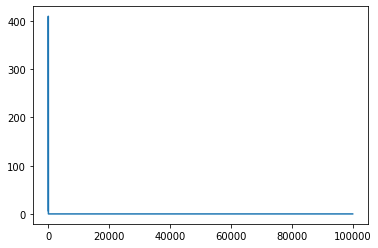

In [386]:
plt.plot(nr_losses)

In [387]:
def nr_inf():
    with torch.no_grad():
        hidden = F.relu(inp_n @ nrw1 + nrb1)
        preds = hidden @ nrw2 + nrb2
    return preds * 100.

In [388]:
nr_pred = nr_inf()

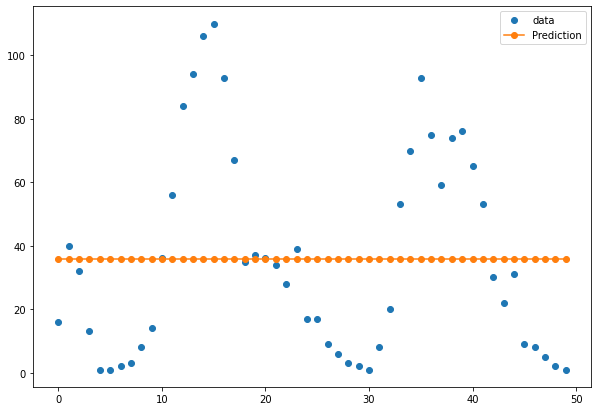

In [389]:
plt.figure(figsize = (10, 7))
x_data = inp.numpy()
pred_data = nr_pred.numpy()
cnt_plot, = plt.plot(x_data, counts, 'o')
pred_plot, = plt.plot(x_data, pred_data, 'o-')
plt.legend([cnt_plot, pred_plot],['data', 'Prediction'])
plt.show()

### Sigmoid - normalized

In [496]:
nsw1 = torch.randn(1, n_h, requires_grad = True)

nsb1 = torch.randn(n_h, requires_grad = True)

nsw2 = torch.randn(n_h, 1, requires_grad = True)

#nsb2 = torch.randn(1, requires_grad = True)

In [497]:
def ns_inf():
    with torch.no_grad():
        hidden = torch.sigmoid(inp_n @ nsw1 + nsb1)
        preds = hidden @ nsw2
        #preds = hidden @ nsw2 + nsb2
    return preds * 100.

In [498]:
ns_losses = []

In [499]:
ln_rate = 0.9999

In [508]:
for i in range(1000000):
    hidden = torch.sigmoid(inp_n @ nsw1 + nsb1)
    #preds = hidden @ nsw2 + nsb2
    preds = hidden @ nsw2
    loss = loss_fn(preds, tgt_n)
    
    loss.backward()
    #print(w1.data, '\n')
    nsw1.data.add_(- ln_rate * nsw1.grad)
    nsb1.data.add_(- ln_rate * nsb1.grad)
    nsw2.data.add_(- ln_rate * nsw2.grad)
    #nsb2.data.add_(- ln_rate * nsb2.grad)
    #print(w1.grad, '\n')
    #print(w1.data, '\n')
    nsw1.grad.zero_()
    nsb1.grad.zero_()
    nsw2.grad.zero_()
    #nsb2.grad.zero_()
    #print(w1.grad, '\n\n')
    ns_losses.append([loss.detach().numpy()])
    if i % 10000 == 0:
        print('loss: ', str(loss.item()))
    

loss:  0.06918203085660934
loss:  0.06911678612232208
loss:  0.06905903667211533
loss:  0.06900764256715775
loss:  0.06896164268255234
loss:  0.06892023235559464
loss:  0.06888272613286972
loss:  0.06884918361902237
loss:  0.06881830096244812
loss:  0.06878995150327682
loss:  0.06876429170370102
loss:  0.06874019652605057
loss:  0.06871847808361053
loss:  0.06869800388813019
loss:  0.06867916136980057
loss:  0.06866174936294556
loss:  0.06864503026008606
loss:  0.06863007694482803
loss:  0.0686158686876297
loss:  0.06860221177339554
loss:  0.06858977675437927
loss:  0.0685783103108406
loss:  0.0685671791434288
loss:  0.06855638325214386
loss:  0.0685465931892395
loss:  0.06853750348091125
loss:  0.0685286745429039
loss:  0.06852004677057266
loss:  0.06851168721914291
loss:  0.0685042068362236
loss:  0.06849741190671921
loss:  0.06849077343940735
loss:  0.06848429888486862
loss:  0.06847795844078064
loss:  0.06847178936004639
loss:  0.06846587359905243
loss:  0.06846079975366592
loss:  

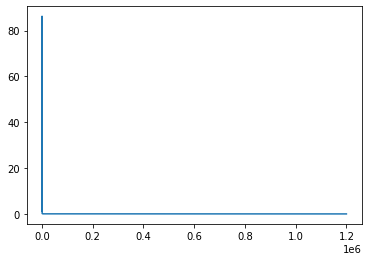

In [509]:
plt.plot(ns_losses)

In [510]:
ns_pred = ns_inf()

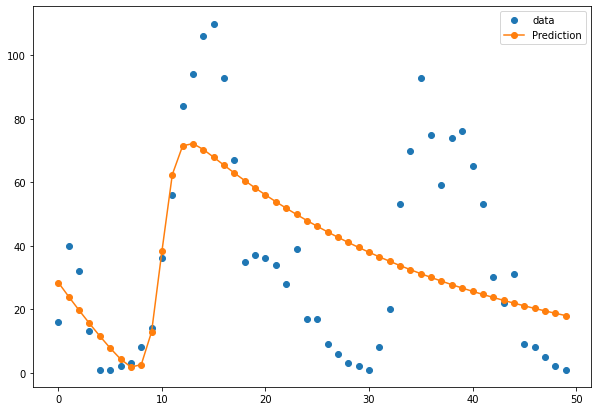

In [511]:
plt.figure(figsize = (10, 7))
x_data = inp.numpy()
pred_data = ns_pred.numpy()
cnt_plot, = plt.plot(x_data, counts, 'o')
pred_plot, = plt.plot(x_data, pred_data, 'o-')
plt.legend([cnt_plot, pred_plot],['data', 'Prediction'])
plt.show()

### Sigmoid - normalize only input, not target

In [434]:
n1sw1 = torch.randn(1, n_h, requires_grad = True)

n1sb1 = torch.randn(n_h, requires_grad = True)

n1sw2 = torch.randn(n_h, 1, requires_grad = True)

n1sb2 = torch.randn(1, requires_grad = True)

In [435]:
def n1s_inf():
    with torch.no_grad():
        hidden = torch.sigmoid(inp_n @ n1sw1 + n1sb1)
        preds = hidden @ n1sw2 + n1sb2
    return preds

In [436]:
n1s_losses = []

In [437]:
ln_rate = 0.001

In [438]:
for i in range(100000):
    hidden = torch.sigmoid(inp_n @ n1sw1 + n1sb1)
    preds = hidden @ n1sw2 + n1sb2
    loss = loss_fn(preds, tgt)
    
    loss.backward()
    #print(w1.data, '\n')
    n1sw1.data.add_(- ln_rate * n1sw1.grad)
    n1sb1.data.add_(- ln_rate * n1sb1.grad)
    n1sw2.data.add_(- ln_rate * n1sw2.grad)
    n1sb2.data.add_(- ln_rate * n1sb2.grad)
    #print(w1.grad, '\n')
    #print(w1.data, '\n')
    n1sw1.grad.zero_()
    n1sb1.grad.zero_()
    n1sw2.grad.zero_()
    n1sb2.grad.zero_()
    #print(w1.grad, '\n\n')
    n1s_losses.append([loss.detach().numpy()])
    if i % 10000 == 0:
        print('loss: ', str(loss.item()))
    

loss:  2255.35693359375
loss:  935.5987548828125
loss:  668.9784545898438
loss:  492.6121826171875
loss:  421.555419921875
loss:  231.35623168945312
loss:  134.81552124023438
loss:  104.59893798828125
loss:  79.43688201904297
loss:  59.13417053222656


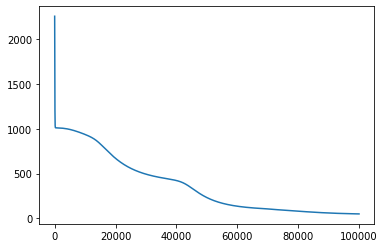

In [439]:
plt.plot(n1s_losses)

In [440]:
n1s_pred = n1s_inf()

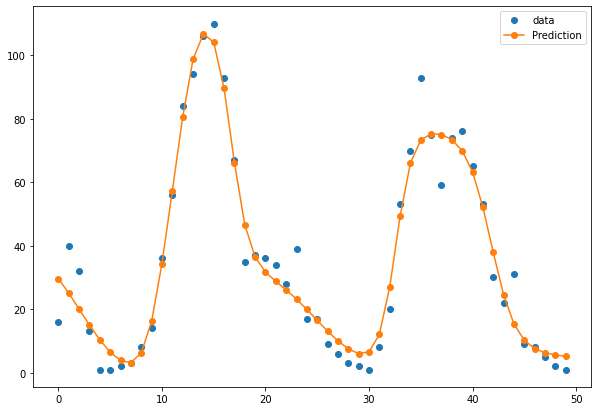

In [441]:
plt.figure(figsize = (10, 7))
x_data = inp.numpy()
pred_data = n1s_pred.numpy()
cnt_plot, = plt.plot(x_data, counts, 'o')
pred_plot, = plt.plot(x_data, pred_data, 'o-')
plt.legend([cnt_plot, pred_plot],['data', 'Prediction'])
plt.show()

Question: Why normalize target value to betweeb [0, 1] make the training worse?

In [529]:
def n1s_inf_test():
    with torch.no_grad():
        hidden = torch.sigmoid(n_inp_test @ n1sw1 + n1sb1)
        preds = hidden @ n1sw2 + n1sb2
    return preds

In [530]:
n1s_pred_test = n1s_inf_test()

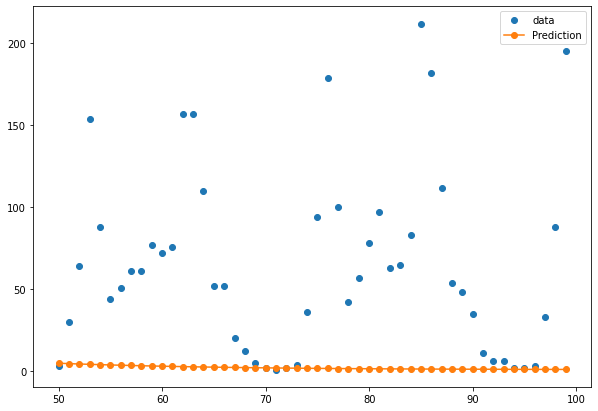

In [531]:
plt.figure(figsize = (10, 7))
x_data = inp_test.numpy()
pred_data = n1s_pred_test.numpy()
cnt_plot, = plt.plot(x_data, counts_test, 'o')
pred_plot, = plt.plot(x_data, pred_data, 'o-')
plt.legend([cnt_plot, pred_plot],['data', 'Prediction'])
plt.show()

### pre-process for successful predictor

In [628]:
df1 = pd.read_csv("data/from_book/hour.csv")

In [629]:
df1

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [631]:
df1.shape

(17379, 17)

check the 1-hot / binary input features

In [632]:
pd.unique(df1['season'])

array([1, 2, 3, 4])

In [633]:
pd.unique(df1['yr'])

array([0, 1])

In [634]:
pd.unique(df1['mnth'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [635]:
pd.unique(df1['hr'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [636]:
pd.unique(df1['holiday'])

array([0, 1])

binary, ok

In [637]:
pd.unique(df1['weekday'])

array([6, 0, 1, 2, 3, 4, 5])

In [638]:
pd.unique(df1['workingday'])

array([0, 1])

binary, ok

In [639]:
pd.unique(df1['weathersit'])

array([1, 2, 3, 4])

transform those features into 1-hot

In [641]:
dummy_fields = ['season', 'yr', 'mnth', 'hr', 'weekday', 'weathersit']
dummy_fields

['season', 'yr', 'mnth', 'hr', 'weekday', 'weathersit']

In [648]:
df_proc = pd.DataFrame()
df_proc.shape

(0, 0)

In [650]:
pd.concat([df_proc, df1],axis=1)
df_proc.shape

(0, 0)

In [662]:
df_proc = Fntl.reduce(lambda acc, x: pd.concat([acc, pd.get_dummies(df1[x],prefix=x,drop_first=False)],axis=1),
                      dummy_fields,
                      pd.DataFrame())

In [663]:
df_proc.columns

Index(['season_1', 'season_2', 'season_3', 'season_4', 'yr_0', 'yr_1',
       'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'hr_0', 'hr_1',
       'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10',
       'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18',
       'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23', 'weekday_0', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'weathersit_1', 'weathersit_2', 'weathersit_3', 'weathersit_4'],
      dtype='object')

In [664]:
df_proc.shape

(17379, 53)

normalize qualitative input features

In [665]:
quant_features = ['cnt', 'temp', 'hum', 'windspeed']

In [668]:
feature_statistics = {}
for k in quant_features:
    mean, std = (df1[k].mean(), df1[k].std())
    feature_statistics[k] = (mean, std)
    df_proc[k] = (df1[k] - mean) / std

In [669]:
df_proc

,season_1,season_2,season_3,season_4,yr_0,yr_1,mnth_1,mnth_2,mnth_3,mnth_4,...,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4,cnt,temp,hum,windspeed
0,1,0,0,0,1,0,1,0,0,0,...,0,1,1,0,0,0,-0.956312,-1.334609,0.947345,-1.553844
1,1,0,0,0,1,0,1,0,0,0,...,0,1,1,0,0,0,-0.823998,-1.438475,0.895513,-1.553844
2,1,0,0,0,1,0,1,0,0,0,...,0,1,1,0,0,0,-0.868103,-1.438475,0.895513,-1.553844
3,1,0,0,0,1,0,1,0,0,0,...,0,1,1,0,0,0,-0.972851,-1.334609,0.636351,-1.553844
4,1,0,0,0,1,0,1,0,0,0,...,0,1,1,0,0,0,-1.039008,-1.334609,0.636351,-1.553844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,-0.388467,-1.230743,-0.141133,-0.211685
17375,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,-0.553859,-1.230743,-0.141133,-0.211685
17376,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,-0.548346,-1.230743,-0.141133,-0.211685
17377,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,-0.708224,-1.230743,-0.348463,-0.456086


In [672]:
df_proc.shape

(17379, 57)

In [1073]:
df_proc.columns

Index(['season_1', 'season_2', 'season_3', 'season_4', 'yr_0', 'yr_1',
       'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'hr_0', 'hr_1',
       'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10',
       'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18',
       'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23', 'weekday_0', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'weathersit_1', 'weathersit_2', 'weathersit_3', 'weathersit_4', 'cnt',
       'temp', 'hum', 'windspeed'],
      dtype='object')

### binary input feature被遺忘了！

separate the target data.

In [673]:
target_fields = ['cnt', 'casual', 'registered']

In [675]:
df_tgts = df1[target_fields]
df_tgts

,cnt,casual,registered
0,16,3,13
1,40,8,32
2,32,5,27
3,13,3,10
4,1,0,1
...,...,...,...
17374,119,11,108
17375,89,8,81
17376,90,7,83
17377,61,13,48


separate train / test data & transform as tensors

In [676]:
df_inp_train = df_proc[:-21*24]
df_inp_test = df_proc[-21*24:]

## 我把normalized cnt 混進來了！悲劇！

In [677]:
df_inp_train.shape

(16875, 57)

In [678]:
df_inp_test.shape

(504, 57)

In [679]:
df_tgts_train, df_tgts_test = df_tgts[:-21*24], df_tgts[-21*24:]

In [680]:
df_tgts_train.shape

(16875, 3)

In [681]:
df_tgts_test.shape

(504, 3)

In [767]:
train_x = torch.tensor(df_inp_train.values).float()

In [845]:
train_y_v = df_tgts_train['cnt'].values
train_y = torch.tensor(train_y_v.reshape(len(train_y_v),1)).float()
train_y.shape

torch.Size([16875, 1])

In [846]:
test_x = torch.tensor(df_inp_test.values).float()

In [848]:
test_y_v = df_tgts_test['cnt'].values
test_y = torch.tensor(test_y_v.reshape(len(test_y_v),1)).float()
test_y.shape

torch.Size([504, 1])

In [687]:
inp_size = train_x.shape[1]
hidden_size = 10
output_size = 1
batch_size = 128

### Make DataSet Object

In [860]:
class BSDataset(Dataset):
    def __init__(self, xs, ys):
        self.xs = xs
        self.ys = ys
    def __len__(self):
        return self.xs.shape[0]
    def __getitem__(self, id):
        #if id == 0:
        #    print(f"x shape: {self.xs[id].shape}")
        #    print(f"y shape: {self.ys[id].shape}")
        return self.xs[id], self.ys[id]

In [861]:
train_set = BSDataset(train_x, train_y)

In [862]:
test_set = BSDataset(test_x, test_y)

In [863]:
train_dataloader = DataLoader(train_set, batch_size=batch_size)
test_dataloader = DataLoader(test_set, batch_size=batch_size)

### Make model

In [896]:
class BSModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(BSModel, self).__init__()
        self.stack = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.Sigmoid(),
            nn.Linear(hidden_size, output_size)
        )
    def forward(self, inp):
        return self.stack(inp)

In [897]:
md0 = BSModel(inp_size, hidden_size, output_size)

### Make the train / test functions

In [898]:
optimizer = optim.SGD(md0.parameters(), lr=0.01)

In [899]:
loss_fn = nn.MSELoss()

In [900]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    loss = 0.
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        #if batch % 100 == 0:
        #    loss, current = loss.item(), batch * len(X)
        #    print(f"loss: {loss:>7f}  [{current:>8d}/{size:>8d}]")
    return loss

In [901]:
def trn_epoches(tot_epoches, model, loss_fn, dataloader, optimizer):
    losses = []
    for i in range(tot_epoches):
        loss = train_loop(dataloader, model, loss_fn, optimizer)
        losses.append(loss)
        if i % 200 == 0:
            print(f"\nepoch {i:>6d}/{tot_epoches:>6d}, loss: {loss:>7f}")
    return losses
        

In [909]:
def test_loop(model, xs, ys, loss_fn):
    with torch.no_grad():
        pred = model(xs)
        test_loss = loss_fn(pred, ys).item()
    print(f"loss: {test_loss:>8f} \n")
    return pred

### Training

In [903]:
loss_hist = trn_epoches(1000, md0,loss_fn, train_dataloader,optimizer)


epoch      0/  1000, loss: 1394.103516

epoch    200/  1000, loss: 53.400578

epoch    400/  1000, loss: 75.192871

epoch    600/  1000, loss: 225.990692

epoch    800/  1000, loss: 134.277634


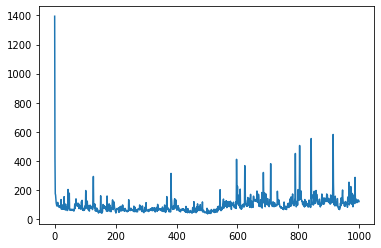

In [923]:
plt.plot(loss_hist)

### Test

In [911]:
pred = test_loop(md0, test_x, test_y, loss_fn)

loss: 146.826920 



In [922]:
pred.numpy().shape

(504, 1)

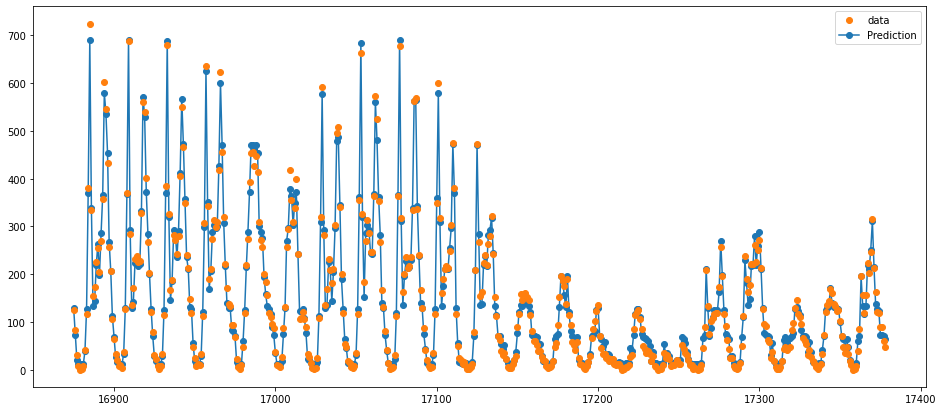

In [952]:
plt.figure(figsize = (16, 7))
x_data = df_inp_test.reset_index()['index']
pred_data = pred.numpy()
tgt_data = test_y.numpy()
pred_plot, = plt.plot(x_data, pred_data, 'o-')
cnt_plot, = plt.plot(x_data, tgt_data, 'o')
plt.legend([cnt_plot, pred_plot],['data', 'Prediction'])
plt.show()

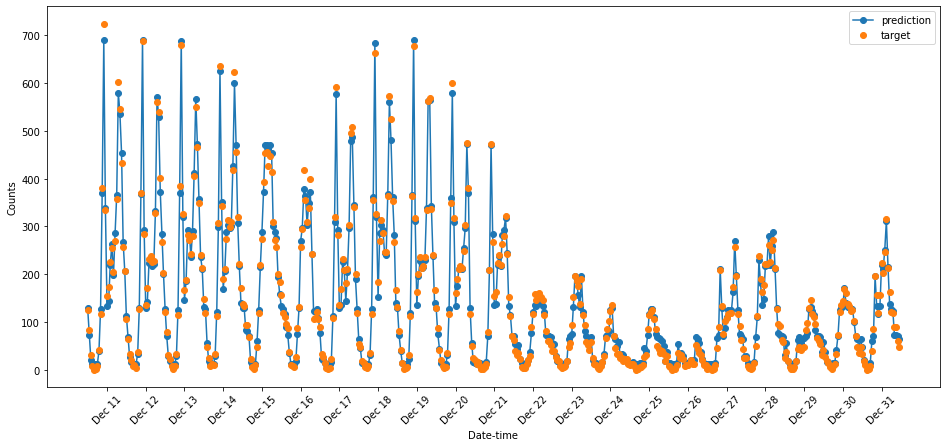

In [934]:
fig, ax = plt.subplots(figsize = (16, 7))


x_data = df_inp_test.reset_index()['index']
pred_data = pred.numpy()
tgt_data = test_y.numpy()

ax.plot(pred_data, 'o-', label='prediction')
ax.plot(tgt_data, 'o', label='target')
ax.legend()
ax.set_xlabel('Date-time')
ax.set_ylabel('Counts')

dates = pd.to_datetime(df1.loc[df_inp_test.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)

In [924]:
df_inp_test.index

RangeIndex(start=16875, stop=17379, step=1)

已經測試過，經過no_grad的model，要重新require_grad ?

In [935]:
%pwd

'/Users/balisun/projects/kionge/capital_bike_share'

In [936]:
torch.save(md0.state_dict(), 'md0_wts.pth')

In [1024]:
for x in md0.parameters():
    print(x.size())
    print("\n")

torch.Size([10, 57])


torch.Size([10])


torch.Size([1, 10])


torch.Size([1])




In [1025]:
prs = list(md0.parameters())

In [1037]:
torch.randn(1, 57).mm(prs[0].t()) + prs[1]

tensor([[ 36.8762,  13.3920,   5.5164,   4.6178,  11.4722,  -5.8468,  33.8215,
          17.3185, -16.8128,  13.6875]], grad_fn=<AddBackward0>)

In [1038]:
torch.randn(57).matmul(prs[0].t())

tensor([-54.1521, -44.4958, -37.6373, -34.5712, -37.2165, -53.3029, -47.5821,
        -34.6188, -24.9571, -39.6682], grad_fn=<SqueezeBackward3>)

In [1035]:
md0(torch.randn(57))

tensor([160.8470], grad_fn=<AddBackward0>)

In [1041]:
df_inp_test.index

RangeIndex(start=16875, stop=17379, step=1)

In [1044]:
bl1 = df1[-21*24:]['dteday'] == '2012-12-22'
bl2 = df1[-21*24:]['dteday'] == '2012-12-23'
bl3 = df1[-21*24:]['dteday'] == '2012-12-24'

In [1045]:
bls = [any(tup) for tup in zip(bl1, bl2, bl3)]

In [1070]:
df_subset_inp = df_inp_test.loc[df1[-21*24:][bls].index]
ar_subset_inp = df_subset_inp.values

In [1071]:
df_subset_tgts = df_tgts_test.loc[df1[-21*24:][bls].index]['cnt']
ar_subset_tgts = df_subset_tgts.values.reshape([len(df_subset_tgts), 1])

In [1072]:
ar_subset_tgts.shape

(71, 1)

In [1040]:
df_inp_test.columns

Index(['season_1', 'season_2', 'season_3', 'season_4', 'yr_0', 'yr_1',
       'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'hr_0', 'hr_1',
       'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10',
       'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18',
       'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23', 'weekday_0', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'weathersit_1', 'weathersit_2', 'weathersit_3', 'weathersit_4', 'cnt',
       'temp', 'hum', 'windspeed'],
      dtype='object')

==================== learn plot
=============

In [954]:
# First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

Text(0.5, 1.0, 'Simple plot')

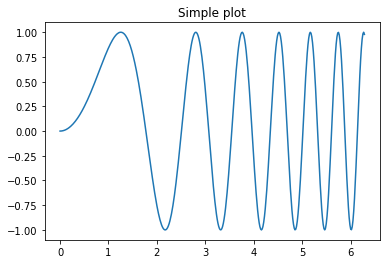

In [955]:
# Create just a figure and only one subplot
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')

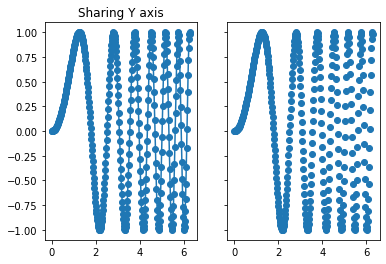

In [960]:
# Create two subplots and unpack the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)
ax1.scatter(x, y)

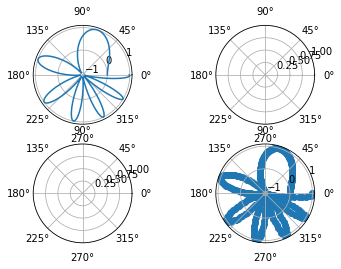

In [958]:
# Create four polar axes and access them through the returned array
fig, axs = plt.subplots(2, 2, subplot_kw=dict(projection="polar"))
axs[0, 0].plot(x, y)
axs[1, 1].scatter(x, y)

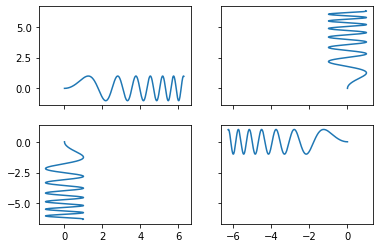

In [970]:
fig, axs = plt.subplots(2, 2, sharex='col',sharey='row')
axs[0,0].plot(x,y)
axs[1,0].plot(y,-x)
axs[0,1].plot(y,x)
axs[1,1].plot(-x,y)

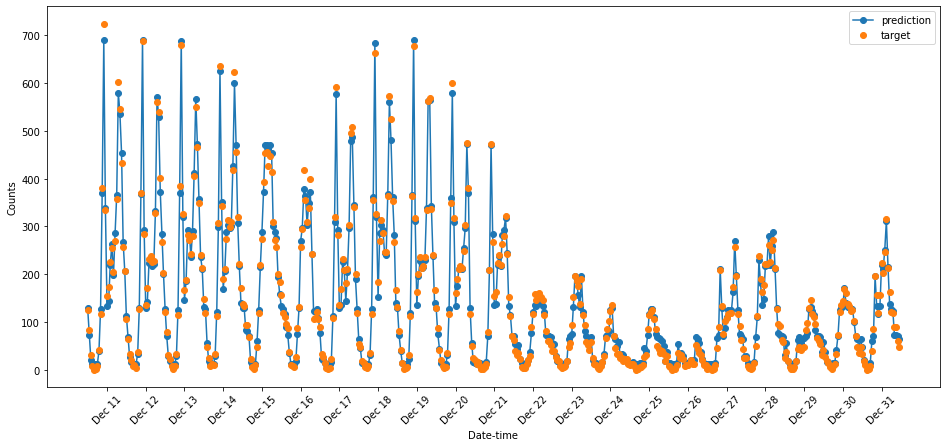

In [1011]:
fig, ax = plt.subplots(figsize = (16, 7))


x_data = df_inp_test.reset_index()['index']
pred_data = pred.numpy()
tgt_data = test_y.numpy()

ax.plot(pred_data, 'o-', label='prediction')
ax.plot(tgt_data, 'o', label='target')
ax.legend()
ax.set_xlabel('Date-time')
ax.set_ylabel('Counts')

dates = pd.to_datetime(df1.loc[df_inp_test.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)

In [981]:
np.arange(len(dates))

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [1006]:
np.arange(len(dates))[12::15]

array([ 12,  27,  42,  57,  72,  87, 102, 117, 132, 147, 162, 177, 192,
       207, 222, 237, 252, 267, 282, 297, 312, 327, 342, 357, 372, 387,
       402, 417, 432, 447, 462, 477, 492])

In [989]:
a = np.array([1, 2, 3, 4, 5, 6])

In [992]:
a[np.newaxis, :]

array([[1, 2, 3, 4, 5, 6]])

In [991]:
a[:,np.newaxis]

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [993]:
a = np.array([[1 , 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])

In [994]:
a[a < 7]

array([1, 2, 3, 4, 5, 6])

In [995]:
five_up = (a >= 5)
five_up

array([[False, False, False, False],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [997]:
b = np.nonzero(a < 7)

In [1000]:
list(zip(b[0], b[1]))

[(0, 0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 1)]

In [1003]:
a[[0,1,0],[1,2,3]]

array([2, 7, 4])